Agrupando o dataset Iris: Tarefa 8 da disciplina Reconhecimento de Padrões. 

Professor: Francisco de Assis Boldt 

Aluno: Diogo de Santana Candido

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


Atividade: Use o KMeans do Scikit-learn para agrupar o dataset Iris usando apenas as suas últimas características (Petal).

Carga do dataset Iris: Os dados e matadados podem ser obtidos em https://archive.ics.uci.edu/ml/datasets/iris

In [56]:
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = np.loadtxt(url, dtype='str', delimiter=',')
X = data[:,2:4].astype(float) #Petal
y = data[:,-1]


target = set(y)
target_names = []

for i in range(len(set(y))):
    target_names.append(target.pop())
target_names



['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

Transformação de dados categóricos em numéricos

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


Visualização dos dados: Petal

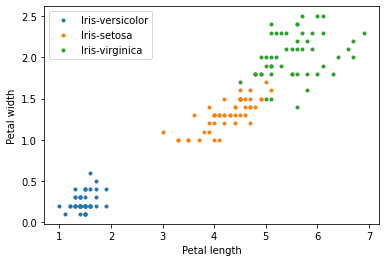

In [58]:
import matplotlib.pyplot as plt
for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], ".", label=target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

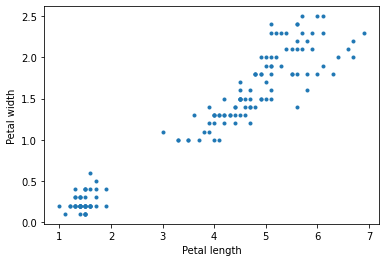

In [59]:
plt.scatter(X[:,0], X[:,1], marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Agrupamento/Clusterização utilizando o algoritmo Kmeans (aula)

In [94]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
    
    def _init_centroids(self, X):
        min = np.min(X, axis=0)
        max = np.max(X, axis=0)
        centroids = []
        for i in range(self.n_clusters):
            centroid = []
            for j in range(X.shape[1]):
                centroid.append(random.uniform(min[j], max[j]))
            centroids.append(centroid)
        self.cluster_centers_ = np.array(centroids)

    def fit(self, X, y=None):
        self._init_centroids(X)
        previous_centroids = self.cluster_centers_.copy()
        while True:
            ypred = self.predict(X) #retorna o número do cluster que pertence 
            for i in range(self.n_clusters):
                if np.any(ypred==i):
                    self.cluster_centers_[i] = np.mean(X[ypred==i], axis=0)
            if np.allclose(previous_centroids, self.cluster_centers_, atol=0.0001):
                break
            previous_centroids = self.cluster_centers_.copy()
   
    def _distancias(self, X):
        diferenca = self.cluster_centers_ - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz

    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self._distancias(X[i])
            centroid = np.argmin(distancias)
            ypred[i] = centroid
        return ypred


kmeans = KMeans()
kmeans.fit(X)
print("Centroides: Aula")
print(kmeans.cluster_centers_)



Centroides: Aula
[[4.29259259 1.35925926]
 [1.464      0.244     ]
 [5.62608696 2.04782609]]


Visualização dos centroides (aula)

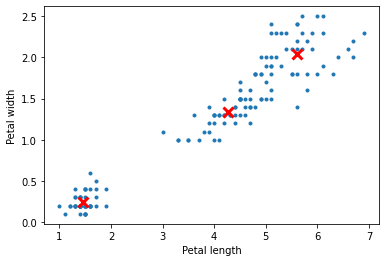

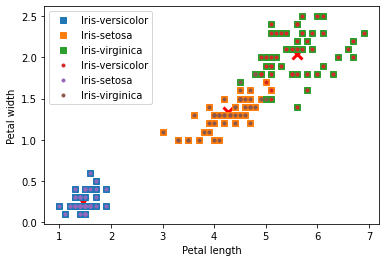

In [109]:
plt.scatter(X[:,0], X[:,1], marker=".")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()


for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "s", label=target_names[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
    plt.plot(X[ypred==i, 0], X[ypred==i, 1], ".", label=target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

Agrupamento/Clusterização utilizando o algoritmo Kmeans (sklearn)

In [113]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
print("Centroides: sklearn")
kmeans.cluster_centers_

Centroides: sklearn


array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

Visualização dos centroides do Kmens (sklearn)

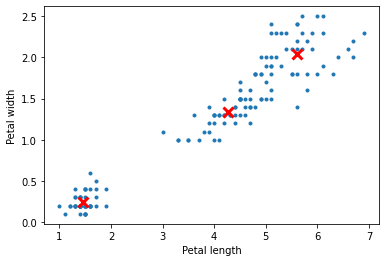

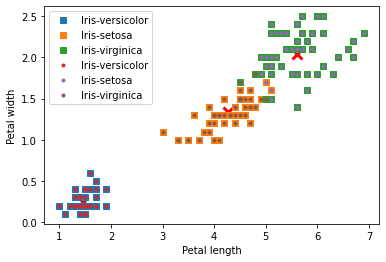

In [114]:
plt.scatter(X[:,0], X[:,1], marker=".")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "s", label=target_names[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="x", color="r", s=100, linewidths=3)
ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
    plt.plot(X[ypred==i, 0], X[ypred==i, 1], ".", label=target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()